In [1]:
#Manipulação e visualização de de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use('ggplot')

#Construção e avaliação de modelos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from skopt import BayesSearchCV
from feature_engine.selection import DropConstantFeatures, SmartCorrelatedSelection, RecursiveFeatureElimination
from sklearn.inspection import permutation_importance

#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from category_encoders import CatBoostEncoder, TargetEncoder
from xgboost import XGBClassifier


#Pré-processamento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
# Importando os dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Análise Exploratória

In [3]:
print(train.shape)
print(test.shape)

(17836, 12)
(7644, 11)


In [4]:
train.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,Europa,Ensino Médio,N,S,2087,1855,Sul,69711.24,Ano,S,Negado
1,EZYV5505,Ásia,Mestrado,S,N,5991,2003,Meio-Oeste,52931.38,Ano,S,Aprovado
2,EZYV5207,Ásia,Ensino Médio,N,N,1426,2000,Ilha,110830.21,Ano,S,Negado
3,EZYV7545,Ásia,Ensino Médio,N,N,3846,1992,Meio-Oeste,91884.68,Semana,S,Negado
4,EZYV16071,Ásia,Ensino Superior,S,N,3957,1949,Nordeste,138155.24,Ano,S,Aprovado


In [5]:
test.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral
0,EZYV22339,Ásia,Ensino Superior,S,N,2414,1973,Nordeste,103320.80,Ano,N
1,EZYV9333,Ásia,Mestrado,N,S,2928,1937,Oeste,49786.35,Ano,S
2,EZYV9740,Ásia,Ensino Superior,S,N,1836,1999,Oeste,60855.83,Ano,S
3,EZYV3328,Ásia,Ensino Superior,S,N,122,2004,Sul,82379.06,Semana,S
4,EZYV12321,América do Sul,Ensino Superior,S,S,1720,2003,Nordeste,6719.81,Ano,S


In [6]:
train.describe()

,num_de_empregados,ano_de_estabelecimento,salario_prevalecente
count,17836.00000,17836.000000,17836.000000
mean,5726.50185,1979.494898,74327.428401
std,23321.37739,42.097194,52795.859573
min,-26.00000,1800.000000,2.136700
25%,1023.00000,1976.000000,33892.912500
50%,2117.00000,1997.000000,70106.920000
75%,3504.25000,2005.000000,107564.715000
max,602069.00000,2016.000000,319210.270000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17836 entries, 0 to 17835
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_do_caso                      17836 non-null  object 
 1   continente                      17836 non-null  object 
 2   educacao_do_empregado           17836 non-null  object 
 3   tem_experiencia_de_trabalho     17836 non-null  object 
 4   requer_treinamento_de_trabalho  17836 non-null  object 
 5   num_de_empregados               17836 non-null  int64  
 6   ano_de_estabelecimento          17836 non-null  int64  
 7   regiao_de_emprego               17836 non-null  object 
 8   salario_prevalecente            17836 non-null  float64
 9   unidade_de_salario              17836 non-null  object 
 10  posicao_em_tempo_integral       17836 non-null  object 
 11  status_do_caso                  17836 non-null  object 
dtypes: float64(1), int64(2), object(

In [8]:
train.nunique()

id_do_caso                        17836
continente                            6
educacao_do_empregado                 4
tem_experiencia_de_trabalho           2
requer_treinamento_de_trabalho        2
num_de_empregados                  6294
ano_de_estabelecimento              199
regiao_de_emprego                     5
salario_prevalecente              17827
unidade_de_salario                    4
posicao_em_tempo_integral             2
status_do_caso                        2
dtype: int64

In [9]:
train.isnull().sum()

id_do_caso                        0
continente                        0
educacao_do_empregado             0
tem_experiencia_de_trabalho       0
requer_treinamento_de_trabalho    0
num_de_empregados                 0
ano_de_estabelecimento            0
regiao_de_emprego                 0
salario_prevalecente              0
unidade_de_salario                0
posicao_em_tempo_integral         0
status_do_caso                    0
dtype: int64

In [10]:
for j in train.columns[1:]:
    print(train.value_counts(j))

continente
Ásia                11765
Europa               2654
América do Norte     2295
América do Sul        590
África                393
Oceania               139
dtype: int64
educacao_do_empregado
Ensino Superior    7151
Mestrado           6755
Ensino Médio       2398
Doutorado          1532
dtype: int64
tem_experiencia_de_trabalho
S    10380
N     7456
dtype: int64
requer_treinamento_de_trabalho
N    15755
S     2081
dtype: int64
num_de_empregados
183       15
795       14
854       13
1341      12
1652      11
          ..
4947       1
4950       1
4962       1
4965       1
602069     1
Length: 6294, dtype: int64
ano_de_estabelecimento
1998    783
2005    729
2001    716
2007    706
1999    602
       ... 
1820      3
1860      2
1824      2
1810      2
1846      1
Length: 199, dtype: int64
regiao_de_emprego
Nordeste      5064
Sul           4912
Oeste         4589
Meio-Oeste    3011
Ilha           260
dtype: int64
salario_prevalecente
138.76       2
109.06       2
64357.58     2

In [11]:
train[["salario_prevalecente", "unidade_de_salario"]]

,salario_prevalecente,unidade_de_salario
0,69711.24,Ano
1,52931.38,Ano
2,110830.21,Ano
3,91884.68,Semana
4,138155.24,Ano
...,...,...
17831,69692.24,Ano
17832,136237.62,Ano
17833,118187.30,Ano
17834,93133.40,Ano


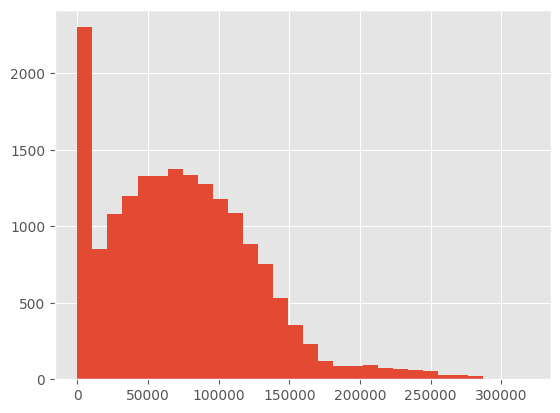

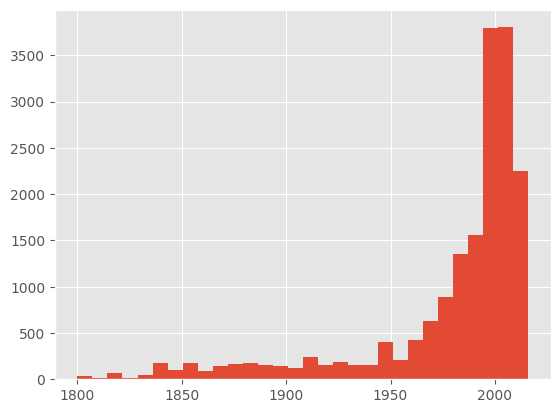

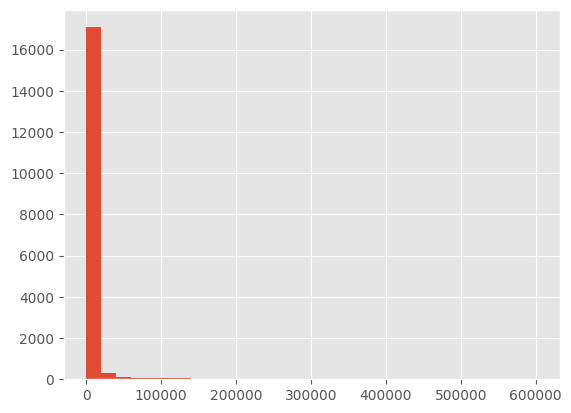

In [12]:
num_cols = ["salario_prevalecente","ano_de_estabelecimento" ,"num_de_empregados"]
for k in num_cols:
    plt.hist(train[k], bins = 30)
    plt.show()

In [13]:
train.groupby("unidade_de_salario")["salario_prevalecente"].agg(['mean', 'std', 'median', 'min', 'max'])

,mean,std,median,min,max
unidade_de_salario,,,,,
Ano,81049.709986,50038.565184,76005.0900,115.8100,319210.2700
Hora,417.758045,276.774608,381.6072,2.1367,999.9195
Mês,82777.722069,57168.134353,69143.4450,3078.3700,249291.1200
Semana,83012.287500,41950.329705,82988.3400,3271.1900,234406.3600


## Data Preparation

In [14]:
# Criando dataframes com dados de treino e teste
df = pd.DataFrame(train)
df_test = pd.DataFrame(test)

# Mudando os nomes das colunas
df.columns = ['id', 'continente', 'escolaridade',
       'tem_experiencia', 'requer_treinamento',
       'num_empregados', 'ano_fundacao', 'regiao',
       'salario_medio', 'periodicidade',
       'tempo_integral', 'status']

df_test.columns = ['id', 'continente', 'escolaridade',
       'tem_experiencia', 'requer_treinamento',
       'num_empregados', 'ano_fundacao', 'regiao',
       'salario_medio', 'periodicidade',
       'tempo_integral']


"df.drop(columns = ['salario_medio', 'periodicidade'], inplace = True)\ndf_test.drop(columns = ['salario_medio', 'periodicidade'], inplace = True)\n"

In [15]:
# Criando cópia do dataset de treino
df2 = df.copy()

# dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df2.drop(["id", "status"], axis=1), df2["status"], test_size=0.2, random_state=1
)


In [16]:
print(X_train.shape)
print(y_train.shape)

(14268, 10)
(14268,)


### Pré-processamento

In [19]:
# features categóricas
cat_vars = list(df2[['continente', 'escolaridade', 'regiao', 'periodicidade',
                     'tem_experiencia', 'requer_treinamento', 'tempo_integral']])

# pipeline para pré-processamento das variáveis categóricas
cat_transformer = Pipeline(steps=[
    ('cat_encoder', CatBoostEncoder(handle_unknown='use_encoded_value'))
])

# Pipeline para aplicar as transformações
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_vars)
], remainder='passthrough')

y_train = y_train.apply(lambda x: 1 if x == 'Aprovado' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'Aprovado' else 0)

#Aplicando a pipeline de pré-processamento
X_train = preprocessor.fit_transform(X_train, y_train)
X_test = preprocessor.transform(X_test)



In [20]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### Tunando hiperparâmetro com Bayesian Search

In [22]:
# Definir o espaço de busca para cada hiperparâmetro
param_space = {
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'n_estimators': (100, 200, 300, 400),
    'max_depth': (3, 5, 'uniform'),
    'subsample': (0.5, 1.0, 'uniform'),
    'colsample_bytree': (0.5, 1.0, 'uniform'),
    'scale_pos_weight': (0.6, 0.75, 'uniform'),
    'min_child_weight' : (1, 10, 'uniform'),
    'reg_lambda' : (0.001, 0.01, 'uniform'),
    'reg_alpha': (0.001, 0.01, 'uniform')
}

# Criar o classificador base
classifier = XGBClassifier()

# Realizar a busca bayesiana
bayes_search = BayesSearchCV(classifier, param_space, n_iter=30, cv=4, scoring='roc_auc', n_jobs=-1)

# Ajustar o modelo com a busca bayesiana
bayes_search.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
best_params = bayes_search.best_params_
print("Melhores hiperparâmetros:")
for param, value in best_params.items():
    print(f"{param}: {value}")

'# Definir o espaço de busca para cada hiperparâmetro\nparam_space = {\n    \'learning_rate\': (0.01, 0.1, \'log-uniform\'),\n    \'n_estimators\': (100, 200, 300, 400),\n    \'max_depth\': (3, 5, \'uniform\'),\n    \'subsample\': (0.5, 1.0, \'uniform\'),\n    \'colsample_bytree\': (0.5, 1.0, \'uniform\'),\n    \'scale_pos_weight\': (0.6, 0.75, \'uniform\'),\n    \'min_child_weight\' : (1, 10, \'uniform\'),\n    \'reg_lambda\' : (0.001, 0.01, \'uniform\'),\n    \'reg_alpha\': (0.001, 0.01, \'uniform\')\n}\n\n# Criar o classificador base\nclassifier = XGBClassifier()\n\n# Realizar a busca bayesiana\nbayes_search = BayesSearchCV(classifier, param_space, n_iter=30, cv=4, scoring=\'roc_auc\', n_jobs=-1)\n\n# Ajustar o modelo com a busca bayesiana\nbayes_search.fit(X_train, y_train)\n\n# Imprimir os melhores hiperparâmetros encontrados\nbest_params = bayes_search.best_params_\nprint("Melhores hiperparâmetros:")\nfor param, value in best_params.items():\n    print(f"{param}: {value}")'

#### Melhores hiperparâmetros encontrados

In [23]:
'''xgb = XGBClassifier(learning_rate=0.01, n_estimators=300, max_depth=3,
                           subsample=0.5, colsample_bytree=0.6,
                    scale_pos_weight  = 0.6, min_child_weight= 10)
''''''

'xgb = XGBClassifier(learning_rate=0.01, n_estimators=300, max_depth=3,\n                           subsample=0.5, colsample_bytree=0.67,\n                    scale_pos_weight  = 0.6, min_child_weight= 10)\n'

## XGBoost

In [24]:
# Instanciando modelo
xgb = XGBClassifier(learning_rate=0.01, n_estimators=300, max_depth=3,
                           subsample=0.5, colsample_bytree=0.67,
                    scale_pos_weight  = 0.6, min_child_weight= 10)
# Treinando modelo
xgb.fit(X_train, y_train)

# Criando variável para guardar as previsões
y_pred = xgb.predict(X_test)

In [25]:
# Métricas de avaliação do modelo
acuracia = accuracy_score(y_test, y_pred)
auc_area = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)

print('F1-Score:', round(f1, 2))
print('Acurácia:', round(acuracia, 2))
print('Recall:', round(recall, 2))
print('Precision:', round(precision, 2))
print('Especificidade:', round(specificity, 2))
print('AUC', round(auc_area, 2))

F1-Score: 0.8
Acurácia: 0.74
Recall: 0.78
Precision: 0.83
Especificidade: 0.65
AUC 0.72


In [26]:
# Embaralhar os índices dos dados de treinamento
indices = np.arange(len(X_train))
np.random.shuffle(indices)

# Definir a validação cruzada embaralhada
kf = KFold(n_splits=4, shuffle=True, random_state=72)

# Aplicar a validação cruzada
roc_scores = cross_val_score(xgb, X_train[indices], y_train[indices], scoring='roc_auc', cv=kf, n_jobs=-1)
roc_mean = roc_scores.mean()
roc_std = roc_scores.std()

# Retornar o resultado formatado
result = "roc_score: {:.2f} (+/- {:.2f})\nroc_scores: {}".format(roc_mean, roc_std, roc_scores)
print(result)



roc_score: 0.77 (+/- 0.01)
roc_scores: [0.75298071 0.77039697 0.78112725 0.77219496]


## Feature Importance com permutação

In [32]:
r = permutation_importance( xgb, X_test, y_test, n_repeats = 30, random_state = 0, scoring = 'f1')

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2*r.importances_std[i] > 0:
        columns = df_test.drop(columns=['id']).columns
        if i < len(columns):
            column_name = columns[i]
            column_width = 5  
            print(f"{column_name:<{column_width}} {r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")


escolaridade 0.068 +/- 0.004
num_empregados 0.043 +/- 0.003
tem_experiencia 0.023 +/- 0.003
requer_treinamento 0.013 +/- 0.002
continente 0.011 +/- 0.002
tempo_integral 0.007 +/- 0.001
ano_fundacao 0.001 +/- 0.000
regiao 0.001 +/- 0.000


In [33]:
# Aplicando pipelines de pré-processamento nos dados de teste
df_test2 = preprocessor.transform(df_test.drop(columns=['id']))

# testando o modelo
df_test['status_do_caso'] = xgb.predict(df_test2)

# Criando dataset com ID e previsão 
submission = df_test[['id', 'status_do_caso']].copy()
submission.columns = ['id_do_caso', 'status_do_caso']
submission.head()

,id_do_caso,status_do_caso
0,EZYV22339,1
1,EZYV9333,0
2,EZYV9740,1
3,EZYV3328,1
4,EZYV12321,1


In [34]:
# Criando arquivo para submissão no kaggle
submission.to_csv('submission_final.csv', index=False)

#### Muitas outras coisas poderiam ser feitas, como: feature engine para modificar as variáveis preditoras, diferentes tipos de codificação para as variáveis categóricas ou binárias, uma análise exploratória mais detalhada para retirar mais insights dos dados, dentre outras técnicas são comumente utilizadas por cientistas de dados. Porém, na construção deste modelo a prioridade foi simplesmente melhorar o desempenho com foco na competição (Aumentar o valor das métricas F1-score e Roc-auc). 